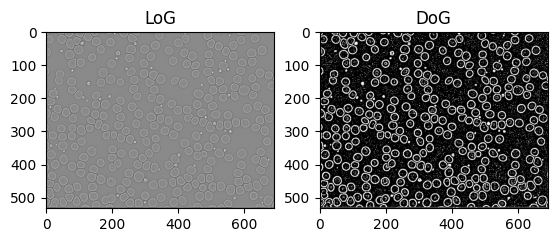

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/platelets.png', cv2.IMREAD_GRAYSCALE)

# LoG (Laplacian of Gaussian)
log = cv2.GaussianBlur(image, (5,5), 0)
log = cv2.Laplacian(log, cv2.CV_64F)

# DoG (Difference of Gaussian)
gaussian1 = cv2.GaussianBlur(image, (5,5), 1)
gaussian2 = cv2.GaussianBlur(image, (5,5), 2)
dog = gaussian1 - gaussian2

# HoG (Histogram of Oriented Gradients)
hog = cv2.HOGDescriptor()
hog_features = hog.compute(image)

# Display results
plt.figure(figsize=(10,4))
plt.subplot(1,3,1), plt.imshow(log, cmap='gray'), plt.title('LoG')
plt.subplot(1,3,2), plt.imshow(dog, cmap='gray'), plt.title('DoG')
plt.show()


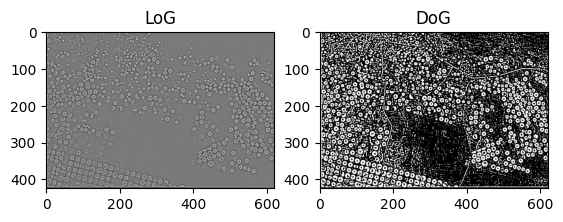

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/satellites.png', cv2.IMREAD_GRAYSCALE)

# LoG (Laplacian of Gaussian)
log = cv2.GaussianBlur(image, (5,5), 0)
log = cv2.Laplacian(log, cv2.CV_64F)

# DoG (Difference of Gaussian)
gaussian1 = cv2.GaussianBlur(image, (5,5), 1)
gaussian2 = cv2.GaussianBlur(image, (5,5), 2)
dog = gaussian1 - gaussian2

# HoG (Histogram of Oriented Gradients)
hog = cv2.HOGDescriptor()
hog_features = hog.compute(image)

# Display results
plt.figure(figsize=(10,4))
plt.subplot(1,3,1), plt.imshow(log, cmap='gray'), plt.title('LoG')
plt.subplot(1,3,2), plt.imshow(dog, cmap='gray'), plt.title('DoG')
plt.show()

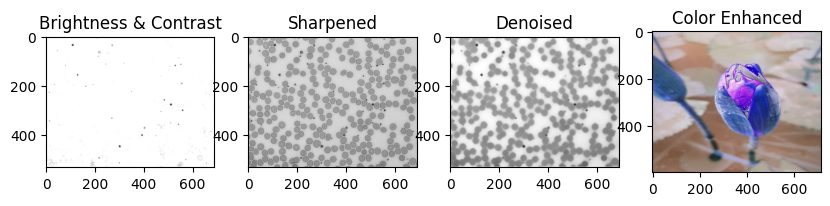

In [ ]:
# Adjusting Brightness and Contrast
alpha = 1.5  # Contrast control
beta = 50    # Brightness control
enhanced = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

# Sharpening
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened = cv2.filter2D(image, -1, kernel)

# Noise Removal
denoised = cv2.fastNlMeansDenoising(image, None, 30, 7, 21)

# Color Enhancement
image_colored = cv2.imread('/content/lotus.png')
hsv = cv2.cvtColor(image_colored, cv2.COLOR_BGR2HSV)
hsv[:,:,1] = hsv[:,:,1] * 1.5  # Increase saturation
color_enhanced = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Display results
plt.figure(figsize=(10,4))
plt.subplot(1,4,1), plt.imshow(enhanced, cmap='gray'), plt.title('Brightness & Contrast')
plt.subplot(1,4,2), plt.imshow(sharpened, cmap='gray'), plt.title('Sharpened')
plt.subplot(1,4,3), plt.imshow(denoised, cmap='gray'), plt.title('Denoised')
plt.subplot(1,4,4), plt.imshow(color_enhanced), plt.title('Color Enhanced')
plt.show()

##NEW


In [ ]:
!pip install deeplake torch torchvision

import deeplake
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 (AlexNet requires this size)
    transforms.ToTensor(),          # Convert image to tensor format
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values (-1 to 1 range)
])


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # For RGB
])



In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training and test datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)


In [ ]:
from torchvision import models

# AlexNet
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 100)  # Modify last layer for 100 classes

# VGG16
vgg16 = models.vgg16(pretrained=True)
vgg16.classifier[6] = nn.Linear(4096, 100)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_alex = optim.Adam(alexnet.parameters(), lr=0.001)
optimizer_vgg = optim.Adam(vgg16.parameters(), lr=0.001)

In [ ]:
trainset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)


In [ ]:
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

In [ ]:
alexnet = models.alexnet(pretrained=True)

In [ ]:
num_features = alexnet.classifier[1].in_features  # Get number of input features for FC layer
alexnet.classifier[1] = nn.Linear(num_features, 4096)  # Adjust fully connected (FC1) layer
alexnet.classifier[6] = nn.Linear(4096, 100)  # CIFAR-100 has 100 classes

In [ ]:
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss (for classification problems)
optimizer_alex = torch.optim.Adam(alexnet.parameters(), lr=0.001)  # Adam optimizer

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)  # Move model to GPU

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224 for AlexNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
print(images.shape)  # Should be [batch_size, 3, 224, 224]

torch.Size([64, 3, 32, 32])


In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# ✅ CORRECT TRANSFORM — includes Resize
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match AlexNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # For RGB
])

# ✅ Reload CIFAR-10 with correct transform
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    break

torch.Size([64, 3, 224, 224])


In [ ]:
for epoch in range(1):  # Run for 1 epoch
    for images, labels in train_loader:  # Fetch mini-batches from train_loader
        images, labels = images.to(device), labels.to(device)  # Move data to GPU

        optimizer_alex.zero_grad()  # Reset gradients
        outputs = alexnet(images)  # Forward pass (predict outputs)
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation (calculate gradients)
        optimizer_alex.step()  # Update weights

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import models

# ✅ Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Step 1: Define transforms (including Resize to 224x224)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Required for AlexNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for RGB
])

# ✅ Step 2: Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
test_loader = DataLoader(testset, batch_size=64, shuffle=False)

# ✅ Step 3: Load pre-trained AlexNet and modify classifier for CIFAR-10 (10 classes)
alexnet = models.alexnet(pretrained=True)
alexnet.classifier[6] = nn.Linear(4096, 10)  # Replace last layer to match 10 classes
alexnet = alexnet.to(device)

# ✅ Step 4: Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=0.001)

# ✅ Step 5: Training loop (1 epoch for demo)
alexnet.train()
for epoch in range(1):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = alexnet(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss:.4f}")

# ✅ Step 6: Evaluation
alexnet.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'✅ Accuracy of AlexNet on CIFAR-10: {100 * correct / total:.2f}%')





Epoch 1, Loss: 1463.4636
✅ Accuracy of AlexNet on CIFAR-10: 41.96%
